In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Data_train
df_train = pd.read_csv('train.csv')
df_train['set'] = 'train'
#Data_test
df_test = pd.read_csv('test.csv')
df_test['set'] = 'test'

#Data (Train + Test)
data = pd.concat((df_train, df_test)).reset_index(drop=True)
# data.drop(['y'], axis=1, inplace=True)

data.head(5)

,w,y,product,work_group,customer,priority,type,opening_datetime,channel,operator,service_center,service_mode,sla_contract,forwarded,set
0,1.0,129.0,234,25,2242,1,1,2021-12-10 09:55:52,4,898,10,1,3,0,train
1,1.0,121.0,158,22,3002,1,1,2021-01-18 15:55:01,4,638,9,1,3,0,train
2,1.0,1011.0,234,25,8116,1,1,2021-06-23 10:55:15,4,2314,10,1,3,0,train
3,1.0,31.0,313,26,11236,1,1,2021-03-25 13:55:34,4,1223,11,1,1,0,train
4,1.0,164.0,313,26,1948,1,1,2021-05-26 16:42:39,4,1938,11,1,1,0,train


In [3]:
data[data.set == 'train'].shape, data[data.set == 'test'].shape

((18000, 15), (8687, 15))

In [4]:
df_train.describe()

,w,y,product,work_group,customer,priority,type,channel,operator,service_center,service_mode,sla_contract,forwarded
count,18000.0,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,1.0,231.318944,245.844944,32.290278,5195.978389,1.020444,1.172389,3.415833,2340.052944,9.832222,1.205278,2.247889,0.066111
std,0.0,1205.578883,143.954976,23.265434,3761.540750,0.179275,1.293053,1.041782,1740.835619,2.943259,0.502148,0.968815,0.248483
min,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,1.0,19.000000,221.000000,25.000000,2222.000000,1.000000,1.000000,2.000000,899.000000,9.000000,1.000000,1.000000,0.000000
50%,1.0,75.000000,234.000000,25.000000,3927.000000,1.000000,1.000000,4.000000,1941.000000,10.000000,1.000000,3.000000,0.000000
75%,1.0,227.000000,298.000000,31.000000,8631.000000,1.000000,1.000000,4.000000,4174.000000,10.000000,1.000000,3.000000,0.000000
max,1.0,100800.000000,1196.000000,131.000000,13193.000000,3.000000,20.000000,5.000000,6140.000000,21.000000,3.000000,3.000000,1.000000


In [5]:
#Different types of the features
df_train.dtypes

w                    int64
y                    int64
product              int64
work_group           int64
customer             int64
priority             int64
type                 int64
opening_datetime    object
channel              int64
operator             int64
service_center       int64
service_mode         int64
sla_contract         int64
forwarded            int64
set                 object
dtype: object

In [6]:
import datetime as dt

data['opening_datetime'] = pd.to_datetime(data['opening_datetime'])
data['opening_datetime']=data['opening_datetime'].map(dt.datetime.toordinal)

# df_train['opening_datetime'] = pd.to_datetime(df_train['opening_datetime'])
# df_train['opening_datetime']=df_train['opening_datetime'].map(dt.datetime.toordinal)

# df_test['opening_datetime'] = pd.to_datetime(df_test['opening_datetime'])
# df_test['opening_datetime']=df_test['opening_datetime'].map(dt.datetime.toordinal)

In [7]:
data.head(5)

,w,y,product,work_group,customer,priority,type,opening_datetime,channel,operator,service_center,service_mode,sla_contract,forwarded,set
0,1.0,129.0,234,25,2242,1,1,738134,4,898,10,1,3,0,train
1,1.0,121.0,158,22,3002,1,1,737808,4,638,9,1,3,0,train
2,1.0,1011.0,234,25,8116,1,1,737964,4,2314,10,1,3,0,train
3,1.0,31.0,313,26,11236,1,1,737874,4,1223,11,1,1,0,train
4,1.0,164.0,313,26,1948,1,1,737936,4,1938,11,1,1,0,train


<AxesSubplot:>

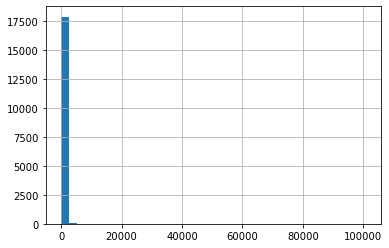

In [8]:
#histogram -- we have some outliers
data['y'].hist(bins = 40)

In [9]:
data['log_y'] = df_train['y'].apply(lambda x: np.log(x))

<AxesSubplot:>

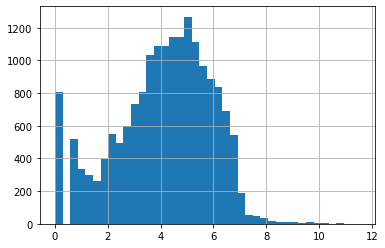

In [10]:
#histogram of log transformed - better distribution but skewed
data['log_y'].hist(bins = 40)

#there is a bunch of values equal to 1

In [11]:
data[data.log_y==0]

,w,y,product,work_group,customer,priority,type,opening_datetime,channel,operator,service_center,service_mode,sla_contract,forwarded,set,log_y
72,1.0,1.0,234,25,8675,1,1,737879,2,3652,10,1,1,0,train,0.0
98,1.0,1.0,234,25,5622,1,1,738054,2,4206,10,1,1,0,train,0.0
126,1.0,1.0,161,1,160,1,1,737942,2,2321,6,1,1,0,train,0.0
157,1.0,1.0,313,27,10893,1,1,738027,2,4814,11,1,1,0,train,0.0
178,1.0,1.0,234,25,3758,1,1,737941,2,155,10,1,1,0,train,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17909,1.0,1.0,234,25,5622,1,1,737930,2,4174,10,1,1,0,train,0.0
17951,1.0,1.0,234,25,10467,1,1,737994,2,4171,10,1,1,0,train,0.0
17960,1.0,1.0,234,25,1228,1,1,737868,2,4210,10,1,1,0,train,0.0
17987,1.0,1.0,234,53,3945,1,1,738116,5,1567,10,2,3,0,train,0.0


In [12]:

#skewness & kurtosis
print("Skewness: %f" % data['log_y'].skew())
print("Kurtosis: %f" % data['log_y'].kurt())

Skewness: -0.439145
Kurtosis: -0.254900


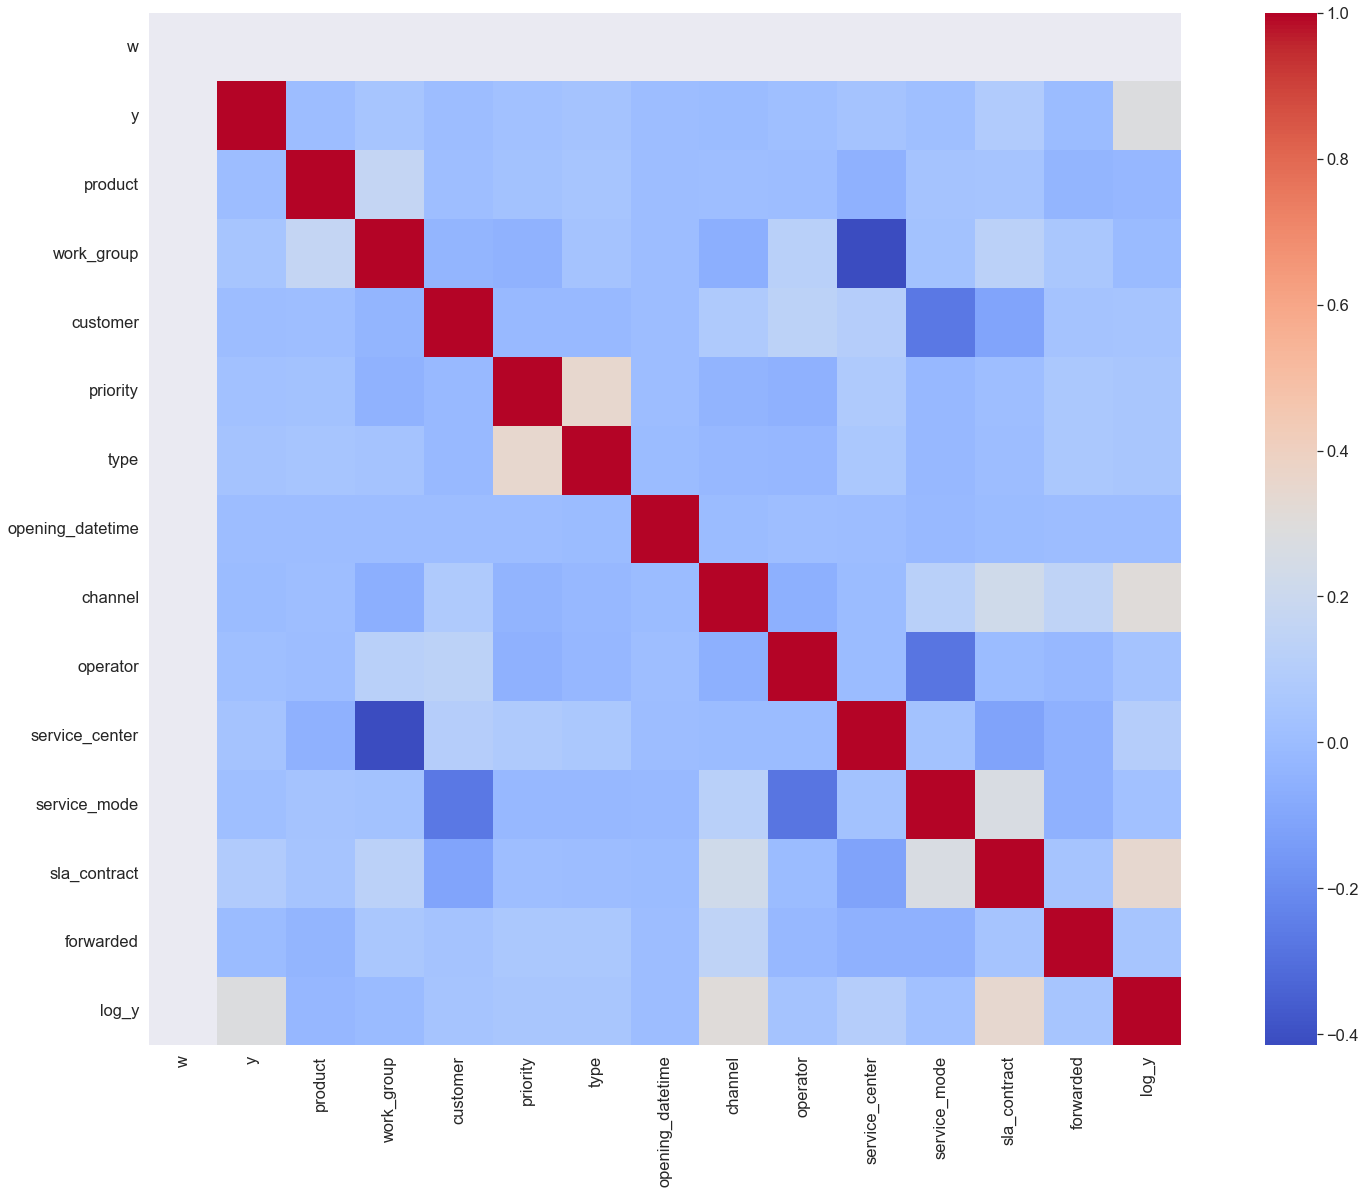

In [15]:
#correlation matrix
corrmat = data.corr()

#Plot a heatmap to visualize the correlations
f, ax = plt.subplots(figsize=(30, 19))
sns.set(font_scale=1.5)
sns.heatmap(corrmat, square=True,cmap='coolwarm');

In [16]:
correlations = corrmat["log_y"].sort_values(ascending=False)
features = np.array(correlations.index[0:10])
features

array(['log_y', 'sla_contract', 'channel', 'y', 'service_center',
       'priority', 'type', 'forwarded', 'customer', 'operator'],
      dtype=object)

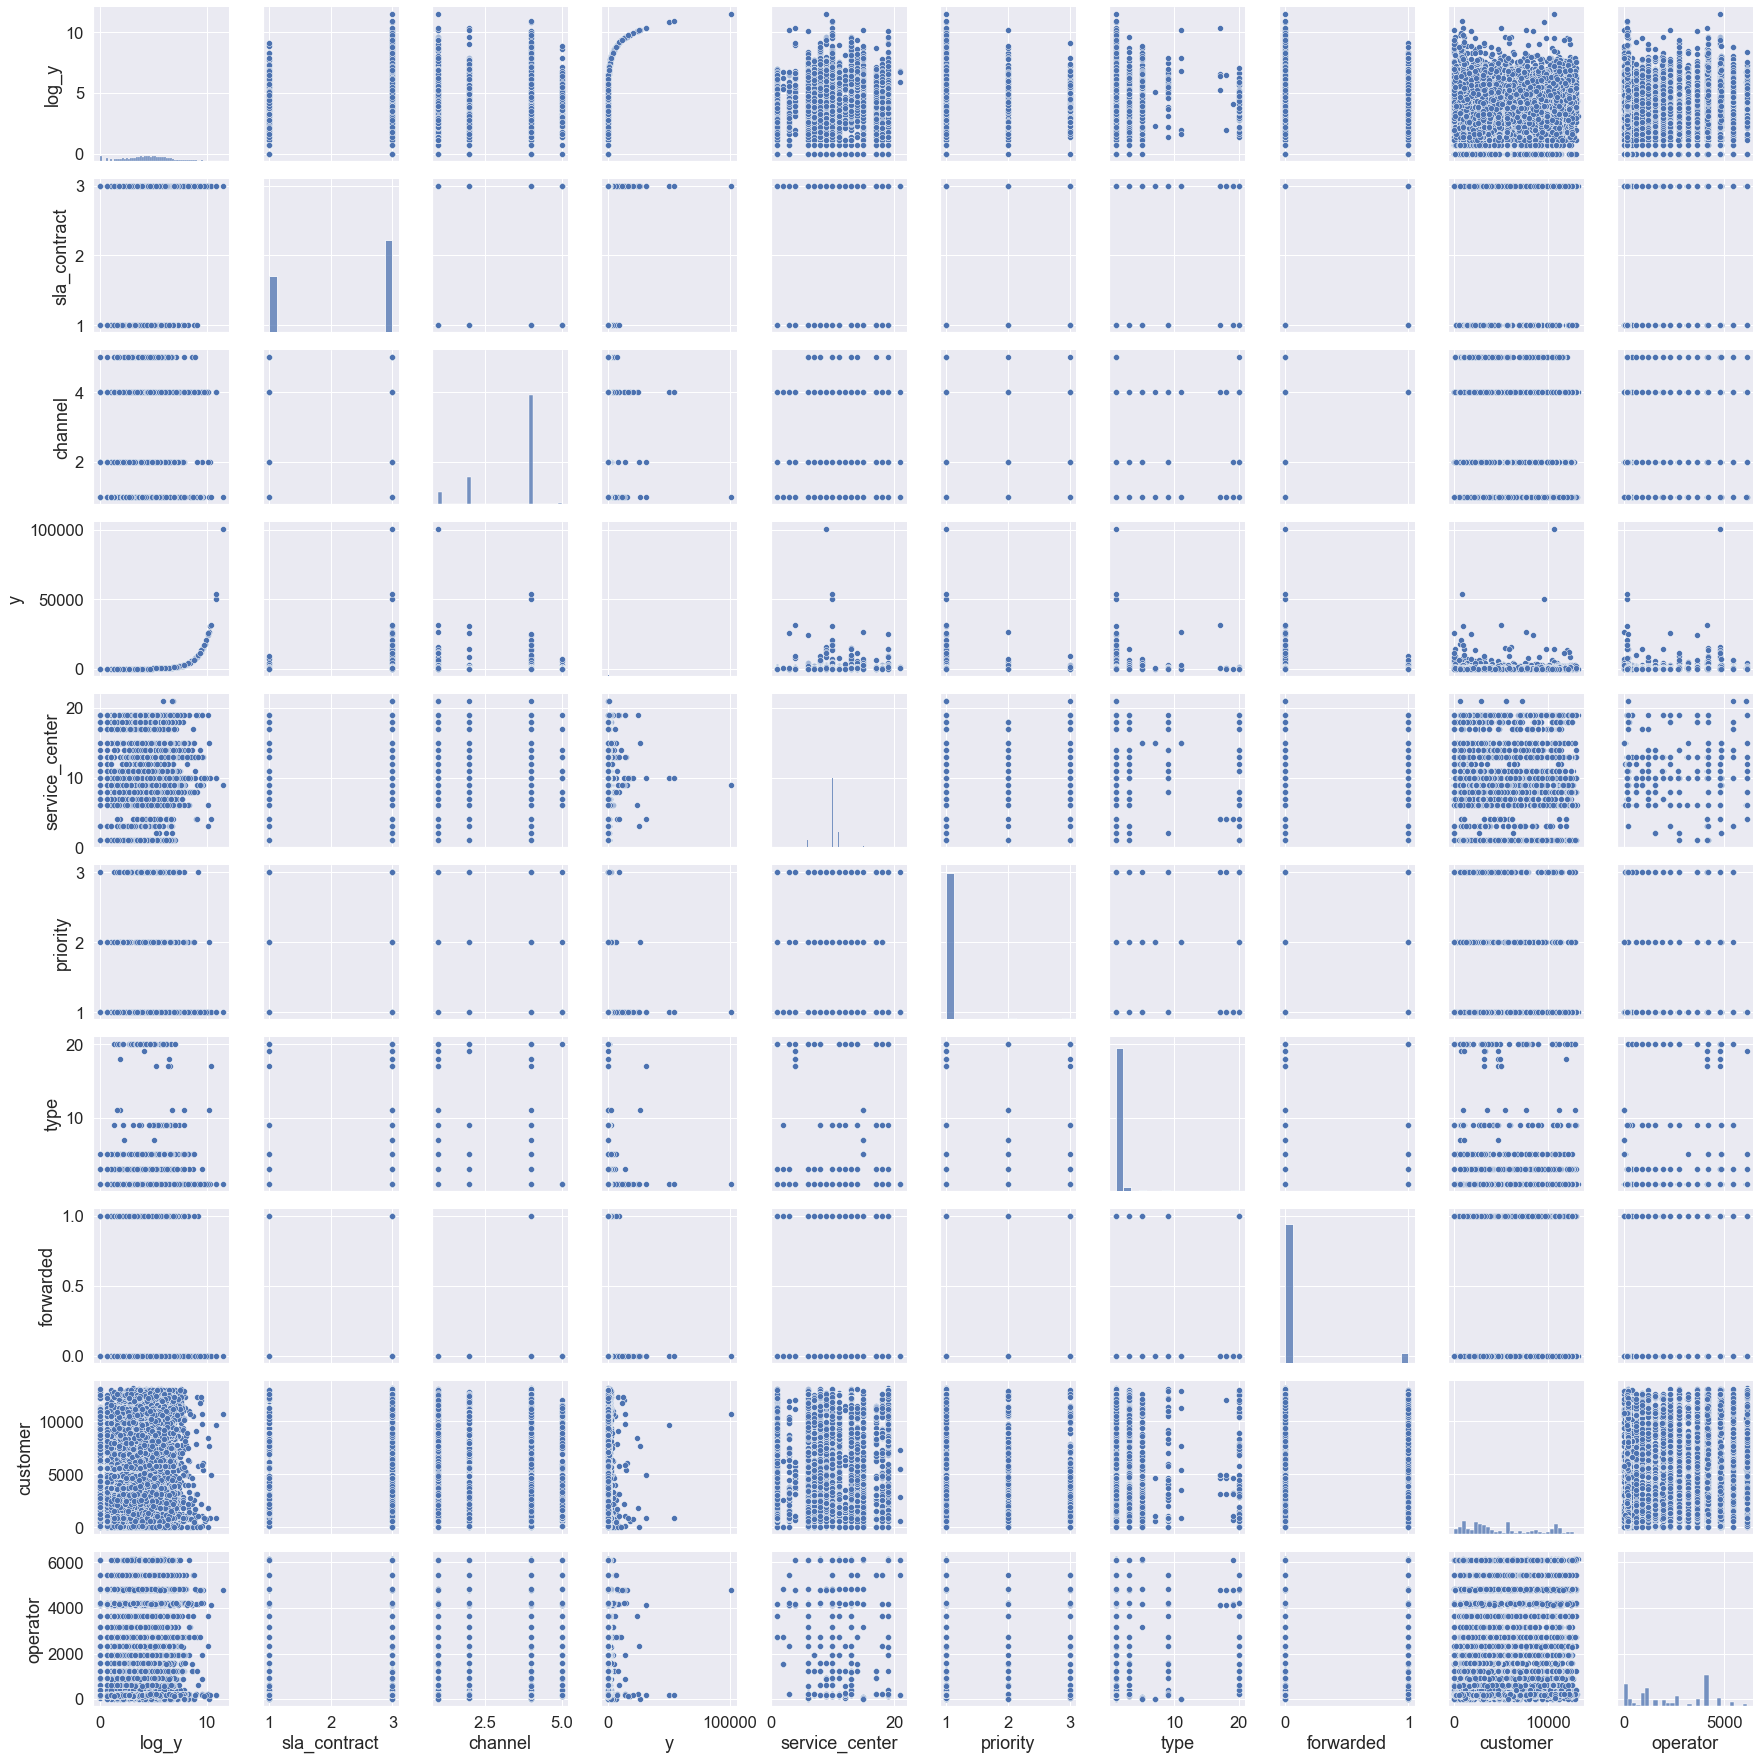

In [18]:
sns.pairplot(data[features], size = 2.5)
plt.show();

In [19]:
data_dummy = pd.get_dummies(data, drop_first=True, columns=['product', 'work_group', 
                                          'priority', 'type', 
                                          'channel', 'service_center',
                                          'service_mode', 'sla_contract',
                                          'forwarded'])

In [20]:
# ML models

#Importing all the librairies we'll need

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [21]:
X_train = data_dummy[data_dummy.set == 'train'].drop(["y","log_y", 'w', 'customer', 'operator', 'set'], axis=1)
X_test = data_dummy[data_dummy.set == 'test'].drop(["y","log_y", 'w', 'customer', 'operator', 'set'], axis=1)

y_train = data_dummy[data_dummy.set == 'train']["log_y"]
print(y_train.shape)

X_test.head(5)

(18000,)


,opening_datetime,product_4,product_6,product_7,product_8,product_9,product_11,product_12,product_17,product_19,...,service_center_14,service_center_15,service_center_17,service_center_18,service_center_19,service_center_21,service_mode_2,service_mode_3,sla_contract_3,forwarded_1
18000,737831,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18001,737889,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18002,737830,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18003,737859,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
18004,738089,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# Later replace this with CV
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

## Linear Regression Model

In [23]:
import statsmodels.api as sm

mod = sm.OLS(y_training, X_training)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     37.47
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        14:57:42   Log-Likelihood:                -25547.
No. Observations:               14400   AIC:                         5.158e+04
Df Residuals:                   14157   BIC:                         5.342e+04
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
opening_datetime   -3.49e-07   9.76e-0

In [24]:
lm = LinearRegression()
lm.fit(X_training,y_training)
print(lm)

LinearRegression()


In [25]:
# print the intercept
print(lm.intercept_)

2.9485489880319165


In [26]:
print(lm.coef_)

[-3.49019943e-07  6.73986367e-01  3.38240850e+00  1.60289519e+00
  1.22402690e+00  2.12244679e+00 -5.59565529e-01  1.53257581e+00
 -2.45699696e+00  3.47173172e+00  1.27512384e+00  1.31107694e+00
  2.33360144e+00  1.95774019e+00  2.01273630e+00  1.72283403e+00
  1.67705716e+00  1.40669796e+00  2.66938189e+00  3.01662304e+00
  1.61025498e+00  2.03202271e+00  2.54443710e+00  3.65321797e+00
  9.12754418e-01  2.26969366e+00  1.61169068e+00 -2.64954144e-01
  1.81115932e+00  1.64386841e+00  1.79143256e+00  1.05304356e+00
  2.49829813e+00  4.25953247e+00  1.81704356e+00  2.49225878e+00
  3.72326354e+00  1.41806627e+00  2.15008987e+00  2.32250053e-11
  1.43791090e-11  3.76419844e+00  2.16976897e+00  1.60454531e+00
  2.02242566e+00  1.30963018e-11  1.12697138e+00  2.95266524e+00
  2.06127016e+00  1.65389889e+00 -5.06261699e-13  1.69654668e+00
  1.11890030e+00  1.89173122e-11  1.81127713e+00  1.96321107e+00
  2.44664414e+00  3.12010598e+00  3.84255095e+00  1.93687953e+00
  1.89781908e+00  2.54227

In [27]:
predictions = lm.predict(X_valid)
predictions= predictions.reshape(-1,1)

In [28]:
submission_predictions = np.exp(predictions)

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, submission_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, submission_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, submission_predictions)))

MAE: 89.77123457971055
MSE: 14742.408101246192
RMSE: 121.41831863951252


### Adding GridSearchCV

In [35]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error

# #define your own mse and set greater_is_better=False
# mse = make_scorer(mean_squared_error,greater_is_better=False)


linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = 'r2')
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best LinReg Model: LinearRegression(normalize=False)
Best Score: 0.3606199856010746


In [32]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.3590099391466136
RMSE Score: 1.4346327071538325


In [33]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.3618773002720766


## Ridge Regression

In [34]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Ridge Model: Ridge(normalize=False)
Best Score: 0.37050290829644333


In [36]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.36629013225478013
RMSE Score: 1.4264623550784317


In [37]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.3713411054002321


## Gradient boosting

In [38]:
from sklearn import ensemble

In [68]:
params = {'n_estimators': 20000, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls' , 'max_features' : 20}
clf = ensemble.GradientBoostingRegressor()

clf.fit(X_training, y_training)

GradientBoostingRegressor()

In [69]:
clf_pred=clf.predict(X_valid)
clf_pred= clf_pred.reshape(-1,1)
r2_clf = r2_score(y_valid, clf_pred)
rmse_clf = np.sqrt(mean_squared_error(y_valid, clf_pred))
print("R^2 Score: " + str(r2_clf))
print("RMSE Score: " + str(rmse_clf))

R^2 Score: 0.40432088243673725
RMSE Score: 1.3829970948364374


In [70]:
scores_clf = cross_val_score(clf, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_clf)))

Cross Validation Score: 0.40489488381449074


## Decision trees

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
parameters_dtr = {"criterion" : ["squared_error", "friedman_mse"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtreg, parameters_dtr, cv=5, verbose = 10, n_jobs=1, scoring='r2')
grid_dtr.fit(X_training, y_training)
# dtreg.fit(X_training, y_training)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START criterion=squared_error, max_features=auto, min_samples_split=2, splitter=best
[CV 1/5; 1/32] END criterion=squared_error, max_features=auto, min_samples_split=2, splitter=best;, score=0.094 total time=   0.2s
[CV 2/5; 1/32] START criterion=squared_error, max_features=auto, min_samples_split=2, splitter=best
[CV 2/5; 1/32] END criterion=squared_error, max_features=auto, min_samples_split=2, splitter=best;, score=0.096 total time=   0.2s
[CV 3/5; 1/32] START criterion=squared_error, max_features=auto, min_samples_split=2, splitter=best
[CV 3/5; 1/32] END criterion=squared_error, max_features=auto, min_samples_split=2, splitter=best;, score=0.066 total time=   0.2s
[CV 4/5; 1/32] START criterion=squared_error, max_features=auto, min_samples_split=2, splitter=best
[CV 4/5; 1/32] END criterion=squared_error, max_features=auto, min_samples_split=2, splitter=best;, score=0.110 total time=   0.2s
[CV 5/5; 1/32]

[CV 1/5; 8/32] END criterion=squared_error, max_features=auto, min_samples_split=10, splitter=random;, score=0.284 total time=   0.1s
[CV 2/5; 8/32] START criterion=squared_error, max_features=auto, min_samples_split=10, splitter=random
[CV 2/5; 8/32] END criterion=squared_error, max_features=auto, min_samples_split=10, splitter=random;, score=0.289 total time=   0.1s
[CV 3/5; 8/32] START criterion=squared_error, max_features=auto, min_samples_split=10, splitter=random
[CV 3/5; 8/32] END criterion=squared_error, max_features=auto, min_samples_split=10, splitter=random;, score=0.287 total time=   0.1s
[CV 4/5; 8/32] START criterion=squared_error, max_features=auto, min_samples_split=10, splitter=random
[CV 4/5; 8/32] END criterion=squared_error, max_features=auto, min_samples_split=10, splitter=random;, score=0.320 total time=   0.1s
[CV 5/5; 8/32] START criterion=squared_error, max_features=auto, min_samples_split=10, splitter=random
[CV 5/5; 8/32] END criterion=squared_error, max_feat

[CV 1/5; 15/32] END criterion=squared_error, max_features=log2, min_samples_split=10, splitter=best;, score=0.250 total time=   0.1s
[CV 2/5; 15/32] START criterion=squared_error, max_features=log2, min_samples_split=10, splitter=best
[CV 2/5; 15/32] END criterion=squared_error, max_features=log2, min_samples_split=10, splitter=best;, score=0.255 total time=   0.1s
[CV 3/5; 15/32] START criterion=squared_error, max_features=log2, min_samples_split=10, splitter=best
[CV 3/5; 15/32] END criterion=squared_error, max_features=log2, min_samples_split=10, splitter=best;, score=0.232 total time=   0.1s
[CV 4/5; 15/32] START criterion=squared_error, max_features=log2, min_samples_split=10, splitter=best
[CV 4/5; 15/32] END criterion=squared_error, max_features=log2, min_samples_split=10, splitter=best;, score=0.284 total time=   0.1s
[CV 5/5; 15/32] START criterion=squared_error, max_features=log2, min_samples_split=10, splitter=best
[CV 5/5; 15/32] END criterion=squared_error, max_features=lo

[CV 3/5; 22/32] END criterion=friedman_mse, max_features=auto, min_samples_split=5, splitter=random;, score=0.215 total time=   0.1s
[CV 4/5; 22/32] START criterion=friedman_mse, max_features=auto, min_samples_split=5, splitter=random
[CV 4/5; 22/32] END criterion=friedman_mse, max_features=auto, min_samples_split=5, splitter=random;, score=0.242 total time=   0.1s
[CV 5/5; 22/32] START criterion=friedman_mse, max_features=auto, min_samples_split=5, splitter=random
[CV 5/5; 22/32] END criterion=friedman_mse, max_features=auto, min_samples_split=5, splitter=random;, score=0.186 total time=   0.1s
[CV 1/5; 23/32] START criterion=friedman_mse, max_features=auto, min_samples_split=10, splitter=best
[CV 1/5; 23/32] END criterion=friedman_mse, max_features=auto, min_samples_split=10, splitter=best;, score=0.221 total time=   0.2s
[CV 2/5; 23/32] START criterion=friedman_mse, max_features=auto, min_samples_split=10, splitter=best
[CV 2/5; 23/32] END criterion=friedman_mse, max_features=auto, 

[CV 1/5; 30/32] END criterion=friedman_mse, max_features=log2, min_samples_split=5, splitter=random;, score=0.254 total time=   0.1s
[CV 2/5; 30/32] START criterion=friedman_mse, max_features=log2, min_samples_split=5, splitter=random
[CV 2/5; 30/32] END criterion=friedman_mse, max_features=log2, min_samples_split=5, splitter=random;, score=0.267 total time=   0.1s
[CV 3/5; 30/32] START criterion=friedman_mse, max_features=log2, min_samples_split=5, splitter=random
[CV 3/5; 30/32] END criterion=friedman_mse, max_features=log2, min_samples_split=5, splitter=random;, score=0.253 total time=   0.1s
[CV 4/5; 30/32] START criterion=friedman_mse, max_features=log2, min_samples_split=5, splitter=random
[CV 4/5; 30/32] END criterion=friedman_mse, max_features=log2, min_samples_split=5, splitter=random;, score=0.286 total time=   0.1s
[CV 5/5; 30/32] START criterion=friedman_mse, max_features=log2, min_samples_split=5, splitter=random
[CV 5/5; 30/32] END criterion=friedman_mse, max_features=log

In [74]:
dtr_pred = grid_dtr.predict(X_valid)
r2_dtr = r2_score(y_valid, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: 0.3166415654880297
RMSE Score: 1.4812875055780679


In [49]:
scores_dtr = cross_val_score(dtreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Cross Validation Score: 0.10730894996379439


## Random Forrest

In [75]:
rfr = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rfr, paremeters_rf, cv=3, verbose = 10, n_jobs=1, scoring='r2')
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3; 1/32] START criterion=mse, max_features=auto, min_samples_split=2, n_estimators=5
[CV 1/3; 1/32] END criterion=mse, max_features=auto, min_samples_split=2, n_estimators=5;, score=0.251 total time=   0.4s
[CV 2/3; 1/32] START criterion=mse, max_features=auto, min_samples_split=2, n_estimators=5
[CV 2/3; 1/32] END criterion=mse, max_features=auto, min_samples_split=2, n_estimators=5;, score=0.253 total time=   0.4s
[CV 3/3; 1/32] START criterion=mse, max_features=auto, min_samples_split=2, n_estimators=5
[CV 3/3; 1/32] END criterion=mse, max_features=auto, min_samples_split=2, n_estimators=5;, score=0.232 total time=   0.4s
[CV 1/3; 2/32] START criterion=mse, max_features=auto, min_samples_split=2, n_estimators=10
[CV 1/3; 2/32] END criterion=mse, max_features=auto, min_samples_split=2, n_estimators=10;, score=0.277 total time=   0.8s
[CV 2/3; 2/32] START criterion=mse, max_features=auto, min_samples_split=2, n_estimat

[CV 3/3; 13/32] END criterion=mse, max_features=auto, min_samples_split=10, n_estimators=5;, score=0.321 total time=   0.4s
[CV 1/3; 14/32] START criterion=mse, max_features=auto, min_samples_split=10, n_estimators=10
[CV 1/3; 14/32] END criterion=mse, max_features=auto, min_samples_split=10, n_estimators=10;, score=0.351 total time=   0.7s
[CV 2/3; 14/32] START criterion=mse, max_features=auto, min_samples_split=10, n_estimators=10
[CV 2/3; 14/32] END criterion=mse, max_features=auto, min_samples_split=10, n_estimators=10;, score=0.355 total time=   0.7s
[CV 3/3; 14/32] START criterion=mse, max_features=auto, min_samples_split=10, n_estimators=10
[CV 3/3; 14/32] END criterion=mse, max_features=auto, min_samples_split=10, n_estimators=10;, score=0.340 total time=   0.7s
[CV 1/3; 15/32] START criterion=mse, max_features=auto, min_samples_split=10, n_estimators=15
[CV 1/3; 15/32] END criterion=mse, max_features=auto, min_samples_split=10, n_estimators=15;, score=0.354 total time=   1.0s


[CV 2/3; 26/32] END criterion=mse, max_features=log2, min_samples_split=5, n_estimators=10;, score=0.326 total time=   0.3s
[CV 3/3; 26/32] START criterion=mse, max_features=log2, min_samples_split=5, n_estimators=10
[CV 3/3; 26/32] END criterion=mse, max_features=log2, min_samples_split=5, n_estimators=10;, score=0.306 total time=   0.3s
[CV 1/3; 27/32] START criterion=mse, max_features=log2, min_samples_split=5, n_estimators=15
[CV 1/3; 27/32] END criterion=mse, max_features=log2, min_samples_split=5, n_estimators=15;, score=0.321 total time=   0.4s
[CV 2/3; 27/32] START criterion=mse, max_features=log2, min_samples_split=5, n_estimators=15
[CV 2/3; 27/32] END criterion=mse, max_features=log2, min_samples_split=5, n_estimators=15;, score=0.334 total time=   0.4s
[CV 3/3; 27/32] START criterion=mse, max_features=log2, min_samples_split=5, n_estimators=15
[CV 3/3; 27/32] END criterion=mse, max_features=log2, min_samples_split=5, n_estimators=15;, score=0.312 total time=   0.4s
[CV 1/3;

In [76]:
# rf = grid_rf.best_estimator_
# rfr.fit(X_training, y_training)
rf_pred = grid_rf.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.36379416163823486
RMSE Score: 1.4292687727931748


In [55]:
scores_rf = cross_val_score(rfr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rf)))

Cross Validation Score: 0.3127451191567919


## Xgboost


In [63]:
from xgboost import XGBRegressor

xgboost = XGBRegressor()
eval_set = [(X_valid, y_valid)]

xgb = xgboost.fit(X_training, y_training, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:-3.10991
[1]	validation_0-error:-3.11001
[2]	validation_0-error:-3.11001
[3]	validation_0-error:-3.11001
[4]	validation_0-error:-3.11001
[5]	validation_0-error:-3.11001
[6]	validation_0-error:-3.11001
[7]	validation_0-error:-3.11001
[8]	validation_0-error:-3.11001
[9]	validation_0-error:-3.11001
[10]	validation_0-error:-3.11001
[11]	validation_0-error:-3.11001
[12]	validation_0-error:-3.11001
[13]	validation_0-error:-3.11001
[14]	validation_0-error:-3.11001
[15]	validation_0-error:-3.11001
[16]	validation_0-error:-3.11001
[17]	validation_0-error:-3.11001
[18]	validation_0-error:-3.11001
[19]	validation_0-error:-3.11001
[20]	validation_0-error:-3.11001
[21]	validation_0-error:-3.11001
[22]	validation_0-error:-3.11001
[23]	validation_0-error:-3.11001
[24]	validation_0-error:-3.11001
[25]	validation_0-error:-3.11001
[26]	validation_0-error:-3.11001
[27]	validation_0-error:-3.11001
[28]	validation_0-error:-3.11001
[29]	validation_0-error:-3.11001
[30]	validation_0-er

In [64]:
xgb_pred = xgb.predict(X_valid)
r2_xgb = r2_score(y_valid, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, xgb_pred))
print("R^2 Score: " + str(r2_xgb))
print("RMSE Score: " + str(rmse_xgb))

R^2 Score: 0.4038733383380364
RMSE Score: 1.3835165321948493


## LGBM

In [83]:
from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(objective='regression', 
#                                        num_leaves=4,
#                                        learning_rate=0.01, 
#                                        n_estimators=20000,
#                                        max_bin=2000, 
#                                        bagging_fraction=0.75,
#                                        bagging_freq=5, 
#                                        bagging_seed=7,
#                                        feature_fraction=0.2,
#                                        feature_fraction_seed=7,
#                                        verbose=-1,
                                       )
gbm = lightgbm.fit(X_training, y_training)

In [84]:
gbm_pred = gbm.predict(X_valid)
r2_gbm = r2_score(y_valid, gbm_pred)
rmse_gbm = np.sqrt(mean_squared_error(y_valid, gbm_pred))
print("R^2 Score: " + str(r2_gbm))
print("RMSE Score: " + str(rmse_gbm))

R^2 Score: 0.4184967628648115
RMSE Score: 1.3664418303063288


In [85]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Decision Tree Regressor", "Random Forest Regressor","Gradient Boosting Regression","XGBoost","LGBM Regressor"],
    "R Squared" : [str(r2_lin)[0:5], str(r2_ridge)[0:5],  str(r2_dtr)[0:5], str(r2_rf)[0:5] , str(r2_clf)[0:5], str(r2_xgb)[0:5], str(r2_gbm)[0:5]],
    "RMSE" : [str(rmse_lin)[0:8], str(rmse_ridge)[0:8],  str(rmse_dtr)[0:8], str(rmse_rf)[0:8], str(rmse_clf)[0:8], str(rmse_xgb)[0:8], str(rmse_gbm)[0:8]]
})
model_performances.round(4)

print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


,Model,R Squared,RMSE
6,LGBM Regressor,0.418,1.366441
4,Gradient Boosting Regression,0.404,1.382997
5,XGBoost,0.403,1.383516
1,Ridge,0.366,1.426462
3,Random Forest Regressor,0.363,1.429268
0,Linear Regression,0.359,1.434632
2,Decision Tree Regressor,0.316,1.481287


In [86]:
print("Sorted by RMSE:")
model_performances.sort_values(by="RMSE", ascending=True)

Sorted by RMSE:


,Model,R Squared,RMSE
6,LGBM Regressor,0.418,1.366441
4,Gradient Boosting Regression,0.404,1.382997
5,XGBoost,0.403,1.383516
1,Ridge,0.366,1.426462
3,Random Forest Regressor,0.363,1.429268
0,Linear Regression,0.359,1.434632
2,Decision Tree Regressor,0.316,1.481287


## Tuning gradient boosting



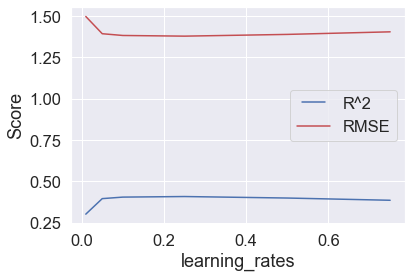

In [88]:
learning_rates = [0.75 ,0.5, 0.25, 0.1, 0.05, 0.01]

r2_results = []
rmse_results = []

for eta in learning_rates:
    model = ensemble.GradientBoostingRegressor(learning_rate=eta)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, r2_results, 'b', label='R^2')
line2, = plt.plot(learning_rates, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('learning_rates')
plt.show()

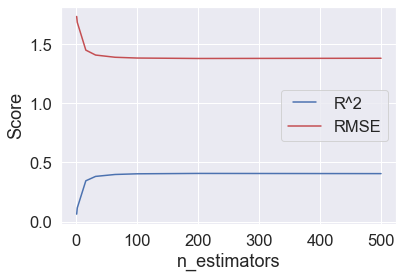

In [89]:
n_estimators = [1, 2, 16, 32, 64, 100, 200, 500]


r2_results = []
rmse_results = []

for estimator in n_estimators:
    model = ensemble.GradientBoostingRegressor(n_estimators=estimator)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, r2_results, 'b', label='R^2')
line2, = plt.plot(n_estimators, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_estimators')
plt.show()

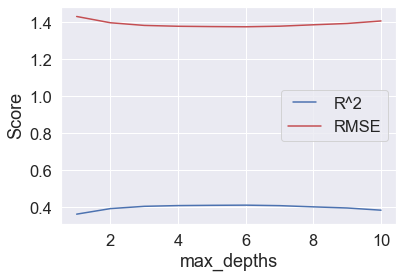

In [90]:
max_depths = np.linspace(1, 10, 10, endpoint=True)


r2_results = []
rmse_results = []

for max_depth in max_depths:
    model = ensemble.GradientBoostingRegressor(max_depth=max_depth)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, r2_results, 'b', label='R^2')
line2, = plt.plot(max_depths, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_depths')
plt.show()

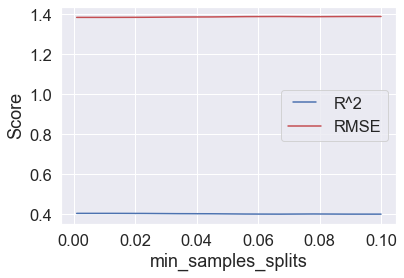

In [94]:
min_samples_splits = np.linspace(0.001, 0.1, 10, endpoint=True)


r2_results = []
rmse_results = []

for min_samples_split in min_samples_splits:
    model = ensemble.GradientBoostingRegressor(min_samples_split=min_samples_split)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, r2_results, 'b', label='R^2')
line2, = plt.plot(min_samples_splits, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_splits')
plt.show()

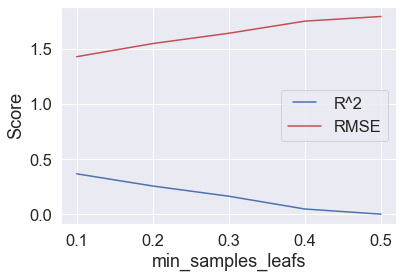

In [95]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)


r2_results = []
rmse_results = []

for min_samples_leaf in min_samples_leafs:
    model = ensemble.GradientBoostingRegressor(min_samples_leaf=min_samples_leaf)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, r2_results, 'b', label='R^2')
line2, = plt.plot(min_samples_leafs, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_leafs')
plt.show()

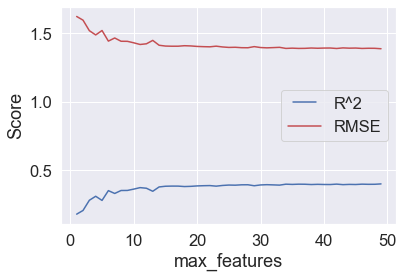

In [97]:
max_features = list(range(1,50))
r2_results = []
rmse_results = []

for max_feature in max_features:
    model = ensemble.GradientBoostingRegressor(max_features=max_feature)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, r2_results, 'b', label='R^2')
line2, = plt.plot(max_features, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_features')
plt.show()

In [102]:
import optuna
from sklearn.model_selection import cross_validate 

def objective(trial: optuna.Trial, X, y, cv, scoring):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 9),
        "subsample": trial.suggest_float("subsample", 0.5, 0.9, step=0.1),
        "max_features": trial.suggest_categorical(
            "max_features", ["auto", "sqrt", "log2"]
        ),
        "random_state": 1121218,
        "n_iter_no_change": 50,  # early stopping
        "validation_fraction": 0.05,
    }
    # Perform CV
    gr_reg = ensemble.GradientBoostingRegressor(**params)
    scores = cross_validate(gr_reg, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    # Compute RMSE
    rmsle = np.sqrt(-scores["test_score"].mean())

    return rmsle

In [104]:
%%time

# Create study that minimizes
study = optuna.create_study(direction="minimize")

# Wrap the objective inside a lambda with the relevant arguments
kf = KFold(n_splits=5, shuffle=True, random_state=1121218)
# Pass additional arguments inside another function
func = lambda trial: objective(trial, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")

# Start optimizing with 100 trials
study.optimize(func, n_trials=100)

print(f"Base RMSE     : {rmsle:.5f}")
print(f"Optimized RMSE: {study.best_value:.5f}")

[I 2022-05-09 18:54:41,277] A new study created in memory with name: no-name-0e73646c-0526-4ae0-af82-f50f4138f3ca
[I 2022-05-09 18:54:44,262] Trial 0 finished with value: 1.8155534759347751 and parameters: {'n_estimators': 100, 'learning_rate': 0.00025111733268941223, 'max_depth': 5, 'subsample': 0.6, 'max_features': 'log2'}. Best is trial 0 with value: 1.8155534759347751.
[I 2022-05-09 18:54:48,185] Trial 1 finished with value: 1.4093844995466769 and parameters: {'n_estimators': 500, 'learning_rate': 0.20066206902013167, 'max_depth': 4, 'subsample': 0.7, 'max_features': 'log2'}. Best is trial 1 with value: 1.4093844995466769.
[I 2022-05-09 18:55:34,373] Trial 2 finished with value: 1.393157116013358 and parameters: {'n_estimators': 1000, 'learning_rate': 0.007415288432326318, 'max_depth': 9, 'subsample': 0.8, 'max_features': 'sqrt'}. Best is trial 2 with value: 1.393157116013358.
[I 2022-05-09 18:59:10,655] Trial 3 finished with value: 1.4546747156726434 and parameters: {'n_estimators

KeyboardInterrupt: 

## Now lets optimize LGBM

In [192]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 0.033013
Feature 1: 0.828794
Feature 2: 2.906001
Feature 3: 16.665928
Feature 4: 2.990761
Feature 5: 6.054938
Feature 6: 1.689421
Feature 7: 121.249143
Feature 8: 2.705047
Feature 9: 1.774197
Feature 10: 12.884939
Feature 11: 0.644070
Feature 12: 14.324060
Feature 13: 4.969016
Feature 14: 0.658007
Feature 15: 347.576299
Feature 16: 6.329737
Feature 17: 22.966527
Feature 18: 2.557175
Feature 19: 1.857254
Feature 20: 0.019202
Feature 21: 20.255525
Feature 22: 0.080768
Feature 23: 1.752448
Feature 24: 0.084169
Feature 25: 10.884568
Feature 26: 1.074514
Feature 27: 0.966533
Feature 28: 5.068829
Feature 29: 45.291419
Feature 30: 15.992624
Feature 31: 9.746033
Feature 32: 5.539825
Feature 33: 5.565748
Feature 34: 9.989507
Feature 35: 0.156788
Feature 36: 0.070355
Feature 37: 23.431474
Feature 38: 27.436358
Feature 39: nan
Feature 40: 1.236613
Feature 41: 3.145760
Feature 42: 0.687285
Feature 43: 613.367708
Feature 44: 1.686529
Feature 45: nan
Feature 46: 0.296482
Feature 47: 2.963

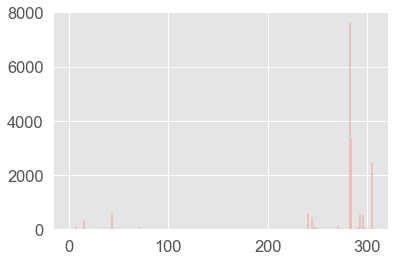

In [194]:

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [185]:
np.array(y_train).dtype

dtype('float64')

In [205]:
# from sklearn.model_selection import StratifiedKFold
from optuna.integration import LightGBMPruningCallback
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def objective(trial, X, y):
    
    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 200, step=2),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 10, 3000, step=5),
        "max_depth": trial.suggest_int("max_depth", -1, 12),
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        fs = SelectKBest(score_func=f_regression, k=50)
        fs.fit(X_train, y_train)
        X_train = fs.transform(X_train)
        X_test = fs.transform(X_test)

        model = LGBMRegressor(objective="regression", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="l1",
            early_stopping_rounds=100,
                        callbacks=[
                LightGBMPruningCallback(trial, "l1")
            ],  # Add a pruning callback
        )
        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        
        cv_scores[idx] = rmse
        
    return np.mean(cv_scores)

In [206]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor")
func = lambda trial: objective(trial, X_train, y_train)

In [ ]:
study.optimize(func, n_trials=500)

In [ ]:
print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

In [ ]:
lightgbm = LGBMRegressor(objective='regression', **study.best_params)
gbm = lightgbm.fit(X_training, y_training)

gbm_pred = gbm.predict(X_valid)
r2_gbm = r2_score(y_valid, gbm_pred)
rmse_gbm = np.sqrt(mean_squared_error(y_valid, gbm_pred))
print("R^2 Score: " + str(r2_gbm))
print("RMSE Score: " + str(rmse_gbm))

## Trying to visualize the process


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 1000 trials
     .. Evaluation metric: mse 
     .. Study direction: minimize mean_squared_error

     . Trial number: 0 finished
     .. Optimization score (lower-better): mean_squared_error: 1.9831613969779565
     .. Evaluation score (lower-better): mse: 1.9831613969779565
 ...........................................................................
     . Trial number: 5 finished
     .. Optimization score (lower-better): mean_squared_error: 1.8930869551178604
     .. Evaluation score (lower-better): mse: 1.8930869551178604
 ...........................................................................
     . Trial number: 50 finished
     .. Optimization score (lower-better): mean_squared_error: 1.8884513663761953
     .. Evaluation score (lower-better): mse: 1.8884513663761953
 ...........................................................................
     . Trial number: 65 finished
     .. Optimization score (lower-bette

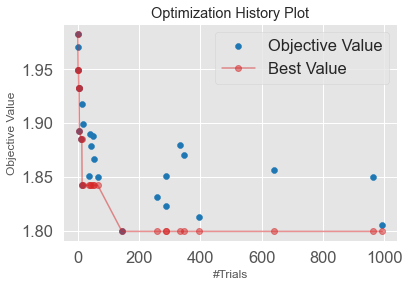

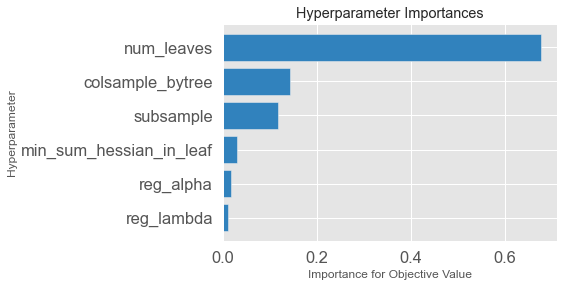

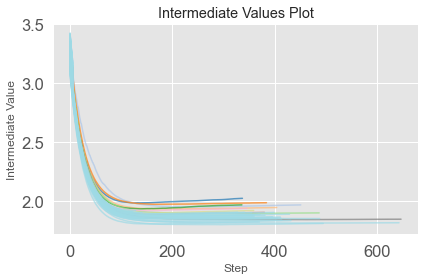

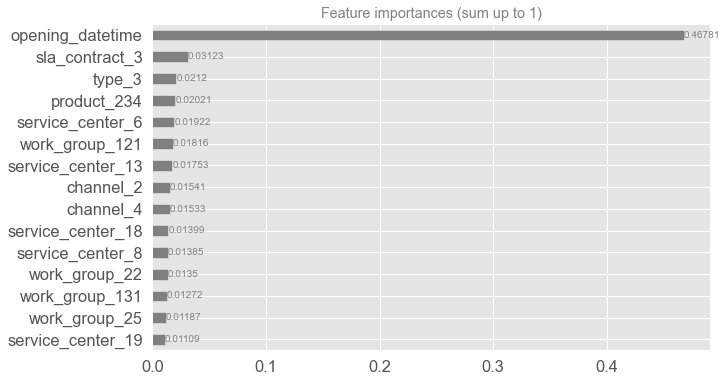


     . Optuna hyperparameters optimization finished
     .. Best trial number:144    |     mean_squared_error:           1.7992073771546409
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  244   |     mse:             1.89437495701921

Time elapsed for fit execution: 3 min 57.259 sec


In [138]:
from verstack import LGBMTuner

# tune the hyperparameters and fit the optimized model
tuner = LGBMTuner(metric = 'mse', trials = 1000) # <- the only required argument
tuner.fit(X_train, y_train)
# check the optimization log in the console.
pred = tuner.predict(X_test)

### Submission templete

In [93]:
# First submission
gbm = lightgbm.fit(X_train, y_train)

predictions = gbm.predict(X_test)
predictions= predictions.reshape(-1,1)

submission_predictions = np.exp(predictions)
np.savetxt('3_lgbm_sub.txt', submission_predictions, fmt='%i')

In [ ]:
# Time to improve now!